In [17]:
import struct 
import numpy as np
from matplotlib import pyplot as plt

from helpers import read_echogram


In [18]:
def test_overlay_wb_echo(filename):
    # Load sounding data and echogram.
    data, echo = read_echogram(filename)
    print("echogram read")

    ## Calculate sampling rate, using assumption that y-axis is in depth (ft)
    ## - not actually used in this function but given here as an illustration.
    # time1 = np.array([i["time1"] for i in data])
    # dz = time1[1:] - time1[:-1]

    ## Calculate the water depth in y-axis samples
    wb = np.array([i["water_depth"] for i in data])
    lower_limit = np.array([i["lower_limit"] for i in data])
    wb_s =  wb * echo.shape[0] / lower_limit

    fig, axes = plt.subplots()
    axes.imshow(echo, aspect='auto')

    axes.plot([i["frame_index"] for i in data],
                 wb_s, linewidth=2, color="red")
    fig.show()

<Header(format=2, version=0, framesize=3200, debug=0)>
echogram read


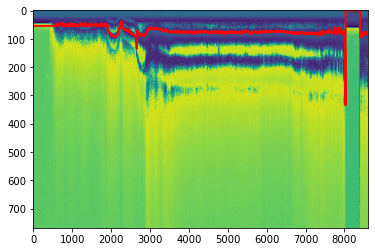

In [19]:
test_overlay_wb_echo('./sample-data-lowrance/HDS5/southern1.sl2')

<Header(format=2, version=0, framesize=3200, debug=0)>
packetsize: 3072 920
echogram read


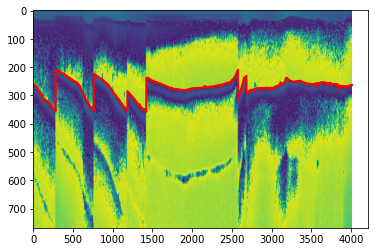

In [20]:
test_overlay_wb_echo('./sample-data-lowrance/Elite_4_Chirp/small.sl2')